In [1]:
!pip install nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
from nixtla import NixtlaClient

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
nixtla_client = NixtlaClient(api_key='nixak-eprBuzLg5RWsnplTijm5q5PzFk11uhfYD73orCgsEvAu8XCGkzSL8kwDjC0JpRg52N87RumEjYMHxUDM')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')
df.head()

,unique_id,ds,y
0,BE,2016-10-22 00:00:00,70.00
1,BE,2016-10-22 01:00:00,37.10
2,BE,2016-10-22 02:00:00,37.10
3,BE,2016-10-22 03:00:00,44.75
4,BE,2016-10-22 04:00:00,37.10


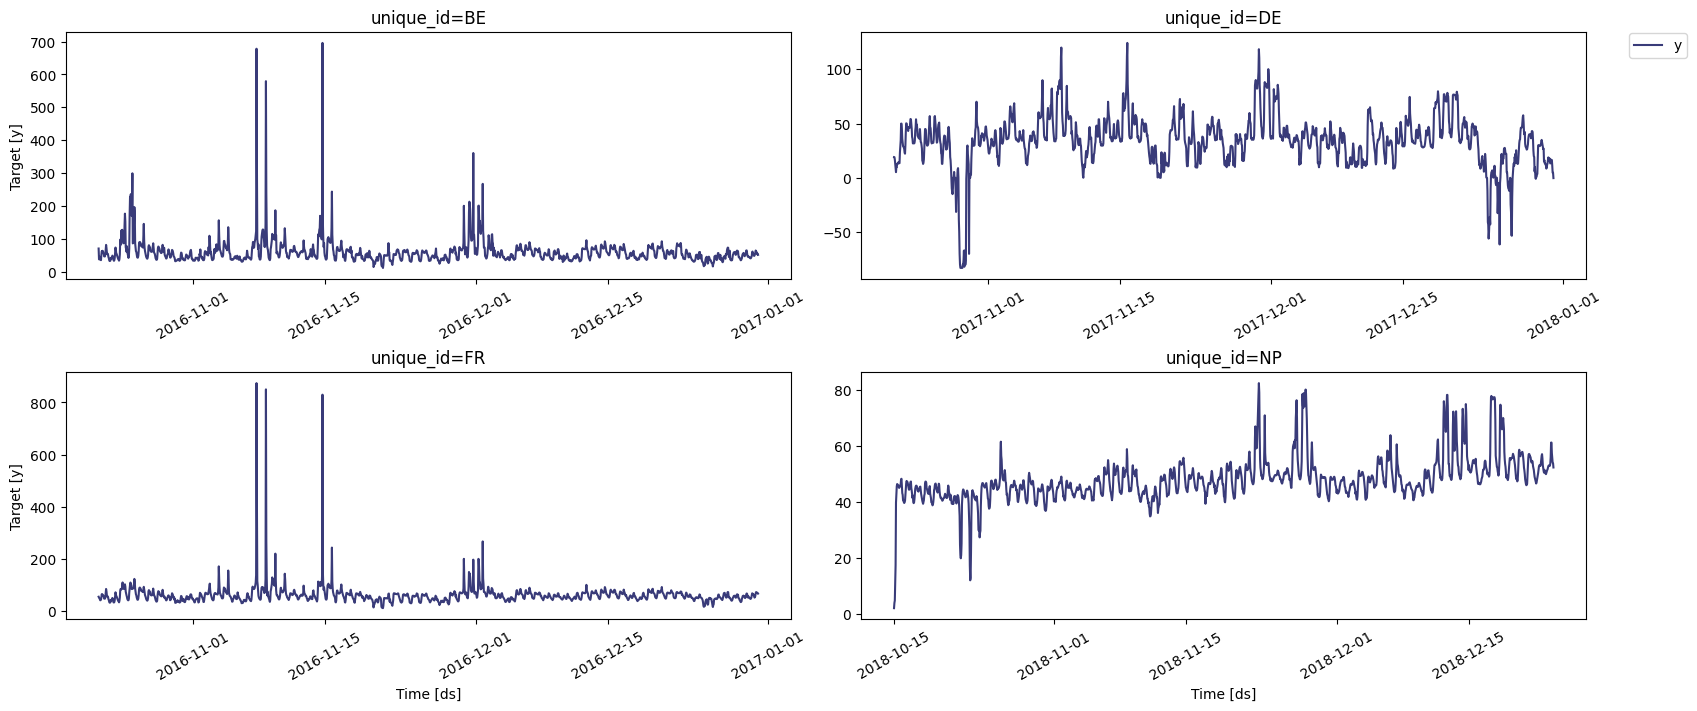

In [6]:
nixtla_client.plot(df)

In [7]:
timegpt_fcst_multiseries_df = nixtla_client.forecast(df=df, h=24, level=[80, 90])
timegpt_fcst_multiseries_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-12-31 00:00:00,45.190582,54.872547,57.369880,35.508617,33.011284
1,BE,2016-12-31 01:00:00,43.244987,51.113632,56.101440,35.376343,30.388530
2,BE,2016-12-31 02:00:00,41.958897,48.577106,54.632140,35.340687,29.285654
3,BE,2016-12-31 03:00:00,39.796680,47.265990,49.683876,32.327370,29.909485
4,BE,2016-12-31 04:00:00,39.204865,47.411090,47.677826,30.998638,30.731903


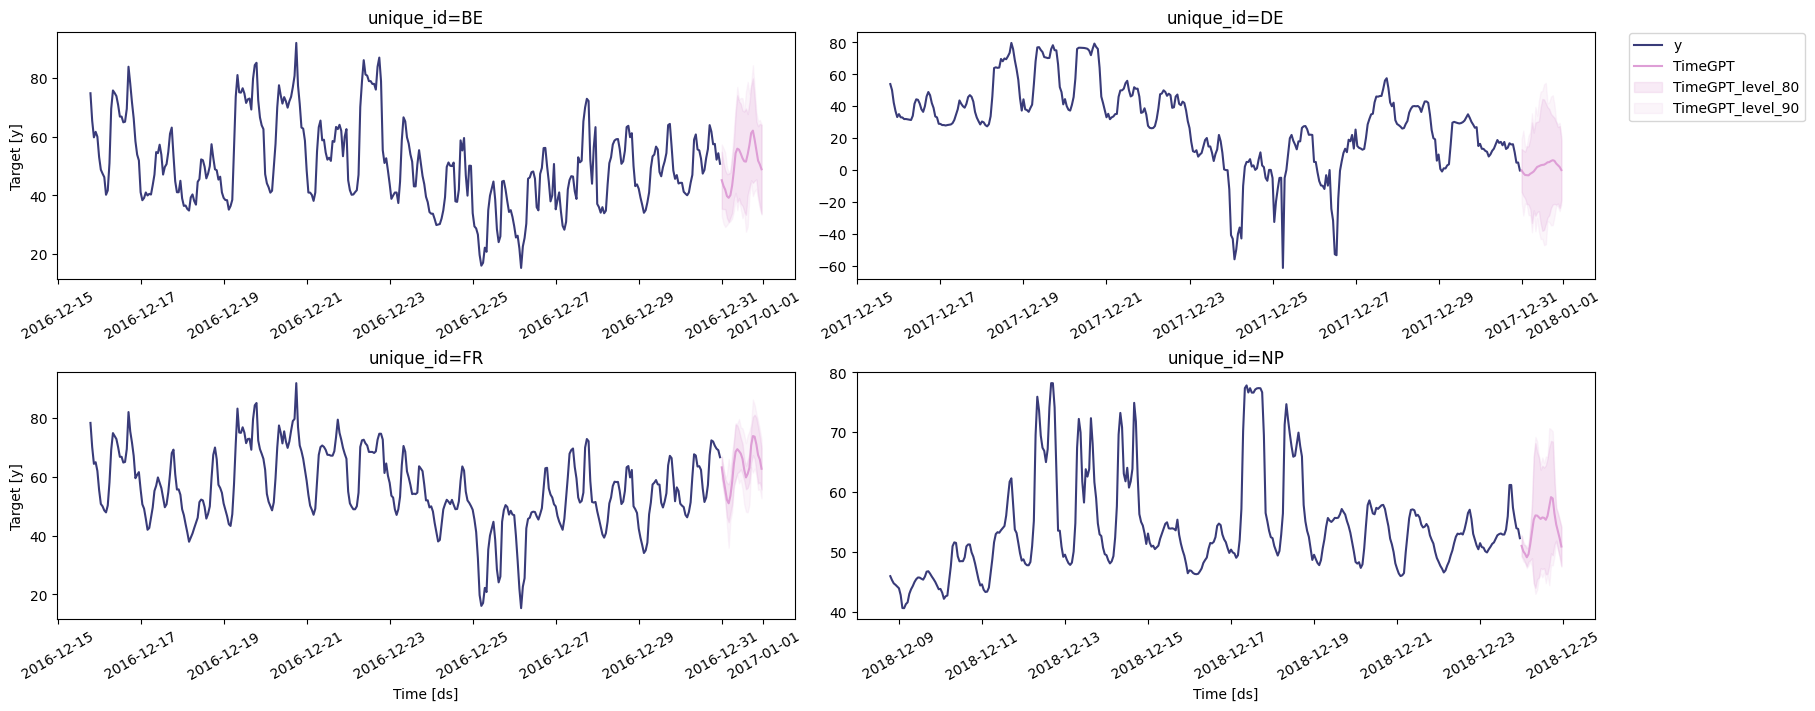

In [8]:
nixtla_client.plot(df, timegpt_fcst_multiseries_df, max_insample_length=365, level=[80, 90])

In [9]:
timegpt_fcst_multiseries_with_history_df = nixtla_client.forecast(df=df, h=24, level=[80, 90], add_history=True)
timegpt_fcst_multiseries_with_history_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-10-27 00:00:00,56.076218,98.196884,110.137505,13.955555,2.014932
1,BE,2016-10-27 01:00:00,52.419724,94.540390,106.481010,10.299061,-1.641562
2,BE,2016-10-27 02:00:00,52.814730,94.935394,106.876015,10.694069,-1.246554
3,BE,2016-10-27 03:00:00,52.590267,94.710930,106.651550,10.469605,-1.471019
4,BE,2016-10-27 04:00:00,52.672990,94.793655,106.734276,10.552326,-1.388297


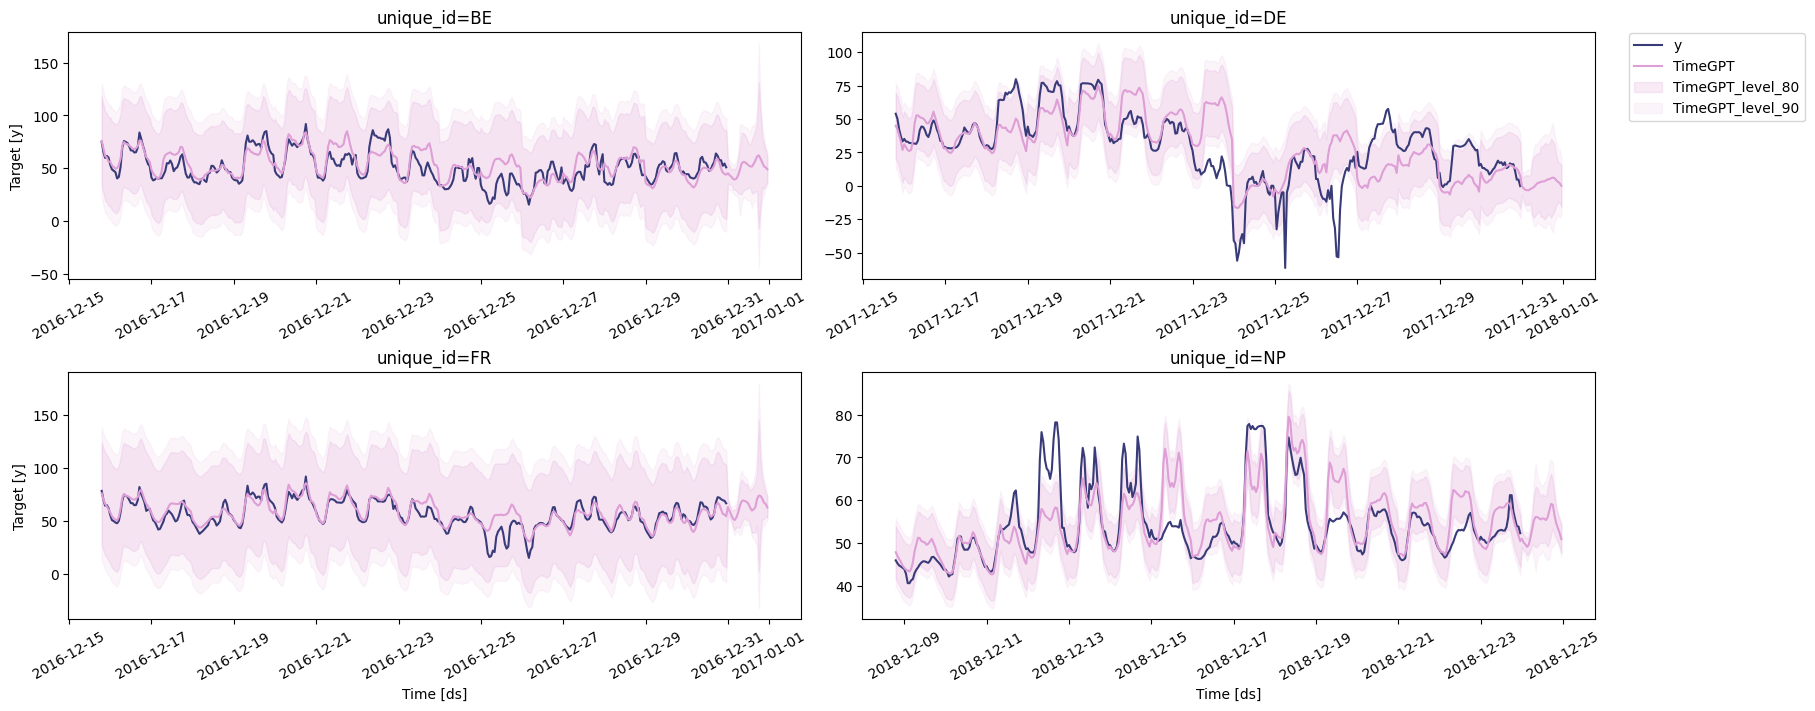

In [10]:
nixtla_client.plot(
    df,
    timegpt_fcst_multiseries_with_history_df.groupby('unique_id').tail(365 + 24),
    max_insample_length=365,
    level=[80, 90],
)